In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../pyLDLE2/')

In [2]:
import numpy as np
from pyLDLE2 import util_, visualize_, datasets
from scipy.sparse import coo_matrix
from scipy import optimize
from scipy.special import erf, erfinv
from matplotlib import pyplot as plt
from scipy.stats import chi2

import bx_util

matplotlib.get_backend() =  module://matplotlib_inline.backend_inline


In [3]:
vis = visualize_.Visualize()

In [4]:
X, labelsMat, ddX = datasets.Datasets().circular_disk_sauer(n=12500)

X.shape =  (7430, 2)


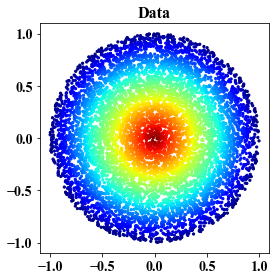

In [5]:
vis.data(X, ddX)

In [51]:
opts = bx_util.default_opts
opts['k_nn'] = 1024
opts['k_tune'] = 1024
opts['ds'] = True
opts['s'] = 0.4
bx_ds, bx_init_ds, K_ds, D_ds = bx_util.estimate_bx(X, opts=opts, ret_K_D = True)

h: 0.14967733783472548
Sinkhorn converged at iter: 3736
s: 0.4


In [52]:
opts['ds'] = False
bx, bx_init = bx_util.estimate_bx(X)

h: 0.14967733783472548


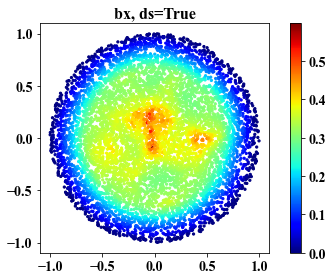

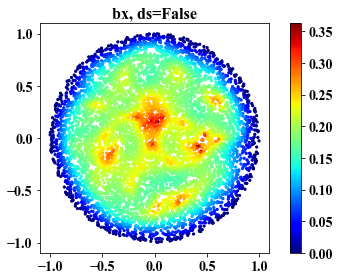

In [53]:
vis.data(X[:,:2], bx_ds, title='bx, ds=True', colorbar=True)
vis.data(X[:,:2], bx, title='bx, ds=False', colorbar=True)

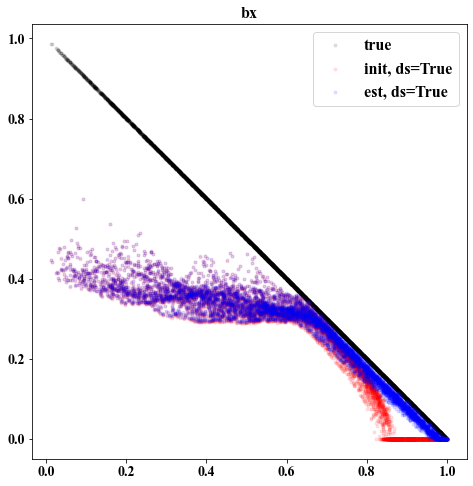

In [54]:
plt.figure(figsize=(8,8))
plt.scatter(np.linalg.norm(X[:,:2], axis=1), ddX, color='k', label='true', alpha=0.1)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), bx_init_ds, color='r', label='init, ds=True', alpha=0.1)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), bx_ds, color='b', label='est, ds=True', alpha=0.1)
plt.axis('image')
plt.title('bx')
plt.legend()

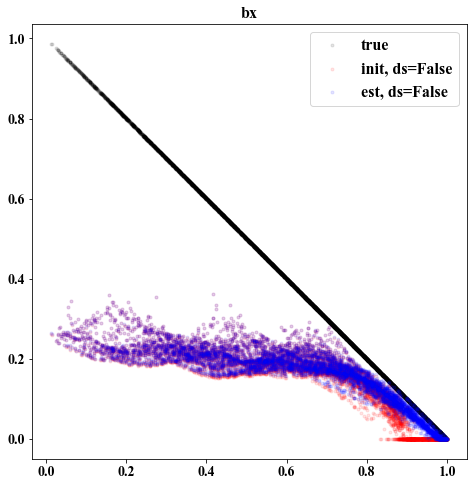

In [55]:
plt.figure(figsize=(8,8))
plt.scatter(np.linalg.norm(X[:,:2], axis=1), ddX, color='k', label='true', alpha=0.1)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), bx_init, color='r', label='init, ds=False', alpha=0.1)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), bx, color='b', label='est, ds=False', alpha=0.1)
plt.title('bx')
plt.axis('image')
plt.legend()

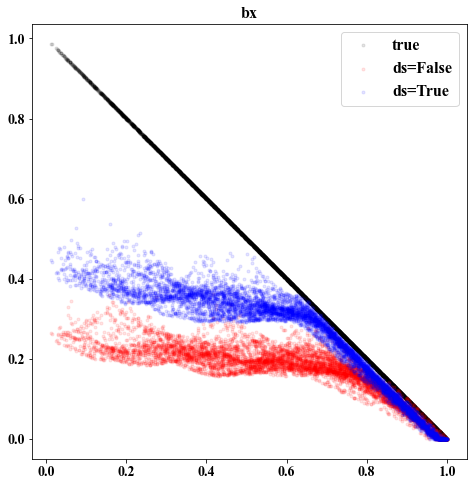

In [56]:
plt.figure(figsize=(8,8))
plt.scatter(np.linalg.norm(X[:,:2], axis=1), ddX, color='k', label='true', alpha=0.1)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), bx, color='r', label='ds=False', alpha=0.1)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), bx_ds, color='b', label='ds=True', alpha=0.1)
plt.title('bx')
plt.axis('image')
plt.legend()

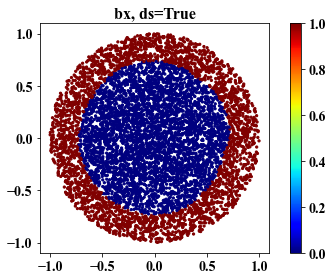

In [57]:
vis.data(X[:,:2], bx_ds < 0.25, title='bx, ds=True', colorbar=True)

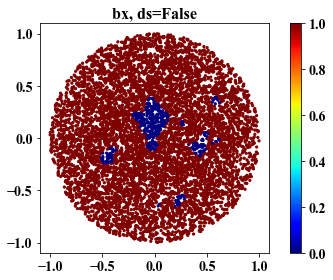

In [58]:
vis.data(X[:,:2], bx < 0.25, title='bx, ds=False', colorbar=True)

In [59]:
from scipy.spatial.distance import cdist
bx_ds_refined = np.min(cdist(X, X[bx_ds < 0.01,:]), axis=1)
bx_refined = np.min(cdist(X, X[bx < 0.01,:]), axis=1)

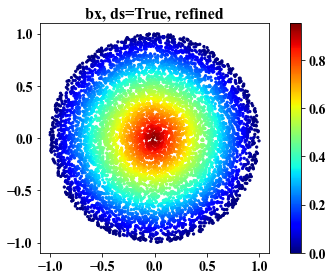

In [60]:
vis.data(X[:,:2], bx_ds_refined, title='bx, ds=True, refined', colorbar=True)

In [65]:
opts2 = bx_util.default_opts
opts2['k_nn'] = 1024
opts2['k_tune'] = 1024
opts2['ds'] = True
opts2['s'] = 0.9
opts2['q_est_type'] = 1

q_ds = bx_util.estimate_q(X, opts=opts2, bx=bx_ds_refined)

h: 0.14967733783472548
Sinkhorn converged at iter: 3736
s: 0.9


In [66]:
opts2['ds'] = False
q1 = bx_util.estimate_q(X, opts=opts2, bx=bx_refined)
q2 = bx_util.estimate_q(X, opts=opts2, bx=bx_ds_refined)

h: 0.14967733783472548
h: 0.14967733783472548


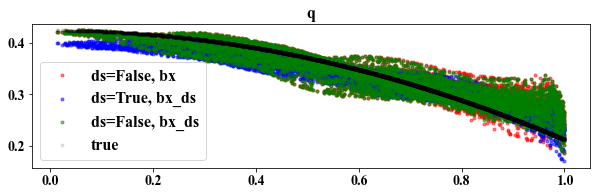

In [67]:
plt.figure(figsize=(10, 5))
plt.scatter(np.linalg.norm(X[:,:2], axis=1), q1, color='r', label='ds=False, bx', alpha=0.5)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), q_ds, color='b', label='ds=True, bx_ds', alpha=0.5)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), q2, color='g', label='ds=False, bx_ds', alpha=0.5)
r = np.linalg.norm(X[:,:2], axis=1)
plt.scatter(r, (2/(3*np.pi))*(2-r**2), color='k', label='true', alpha=0.1)
plt.title('q')
plt.legend()
plt.axis('image')
plt.show()

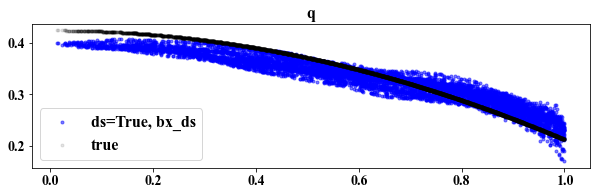

In [68]:
plt.figure(figsize=(10, 5))
plt.scatter(np.linalg.norm(X[:,:2], axis=1), q_ds, color='b', label='ds=True, bx_ds', alpha=0.5)
r = np.linalg.norm(X[:,:2], axis=1)
plt.scatter(r, (2/(3*np.pi))*(2-r**2), color='k', label='true', alpha=0.1)
plt.title('q')
plt.legend()
plt.axis('image')
plt.show()

# Multiple runs

seed: 102
X.shape =  (7339, 2)
h: 0.07104545663480677
Sinkhorn converged at iter: 2285
s: 0.3
h: 0.07104545663480677
h: 0.07104545663480677
Sinkhorn converged at iter: 2285
s: 0.9
h: 0.07104545663480677
h: 0.07104545663480677


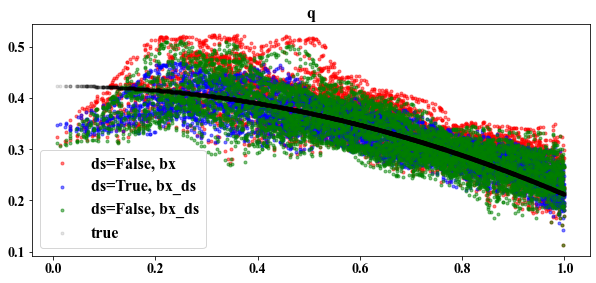

seed: 435
X.shape =  (7431, 2)
h: 0.06935802673913732
Sinkhorn converged at iter: 2943
s: 0.3
h: 0.06935802673913732
h: 0.06935802673913732
Sinkhorn converged at iter: 2943
s: 0.9
h: 0.06935802673913732
h: 0.06935802673913732


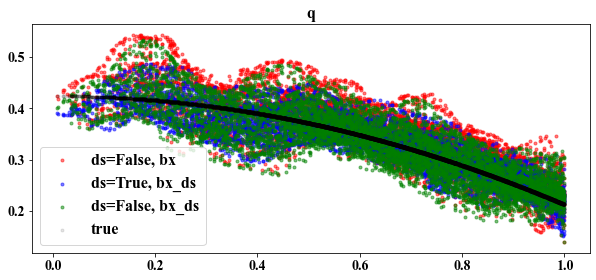

seed: 860
X.shape =  (7304, 2)
h: 0.07090140784250078
Sinkhorn converged at iter: 2825
s: 0.3
h: 0.07090140784250078
h: 0.07090140784250078
Sinkhorn converged at iter: 2825
s: 0.9
h: 0.07090140784250078
h: 0.07090140784250078


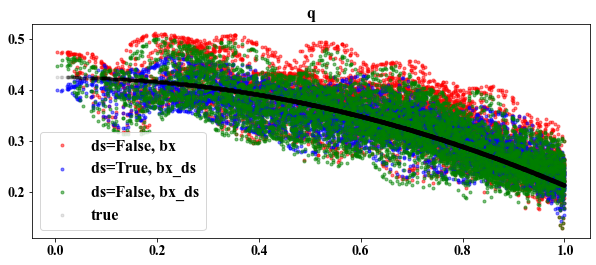

seed: 270
X.shape =  (7378, 2)
h: 0.07141480768857017
Sinkhorn converged at iter: 2955
s: 0.3
h: 0.07141480768857017
h: 0.07141480768857017
Sinkhorn converged at iter: 2955
s: 0.9
h: 0.07141480768857017
h: 0.07141480768857017


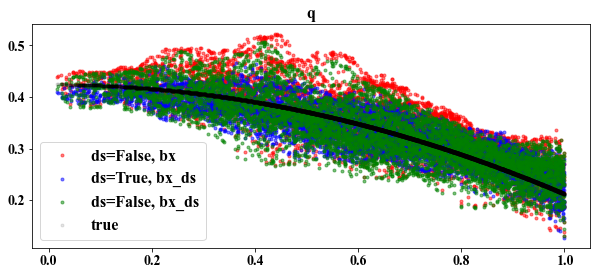

seed: 106
X.shape =  (7372, 2)
h: 0.07189009087224793
Sinkhorn converged at iter: 2863
s: 0.3
h: 0.07189009087224793
h: 0.07189009087224793
Sinkhorn converged at iter: 2863
s: 0.9
h: 0.07189009087224793
h: 0.07189009087224793


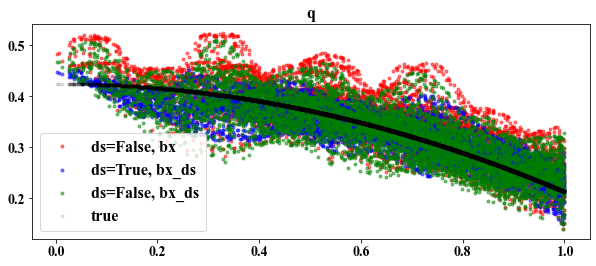

seed: 71
X.shape =  (7358, 2)
h: 0.07080987069052617
Sinkhorn converged at iter: 2879
s: 0.3
h: 0.07080987069052617
h: 0.07080987069052617
Sinkhorn converged at iter: 2879
s: 0.9
h: 0.07080987069052617
h: 0.07080987069052617


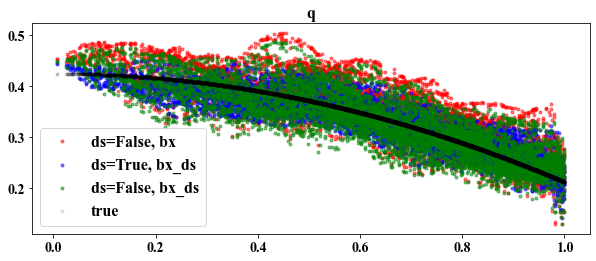

seed: 700
X.shape =  (7421, 2)
h: 0.07074524273608637
Sinkhorn converged at iter: 3008
s: 0.3
h: 0.07074524273608637
h: 0.07074524273608637
Sinkhorn converged at iter: 3008
s: 0.9
h: 0.07074524273608637
h: 0.07074524273608637


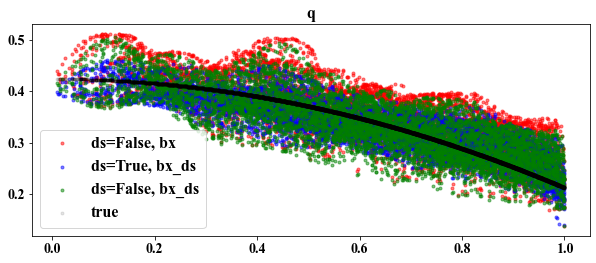

seed: 20
X.shape =  (7414, 2)
h: 0.06745398030887576
Sinkhorn converged at iter: 3253
s: 0.3
h: 0.06745398030887576
h: 0.06745398030887576
Sinkhorn converged at iter: 3253
s: 0.9
h: 0.06745398030887576
h: 0.06745398030887576


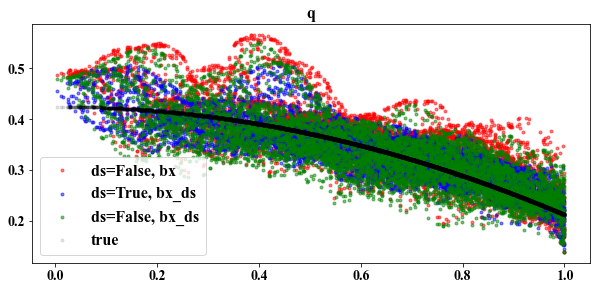

seed: 614
X.shape =  (7335, 2)
h: 0.07182478969678295
Sinkhorn converged at iter: 2880
s: 0.3
h: 0.07182478969678295
h: 0.07182478969678295
Sinkhorn converged at iter: 2880
s: 0.9
h: 0.07182478969678295
h: 0.07182478969678295


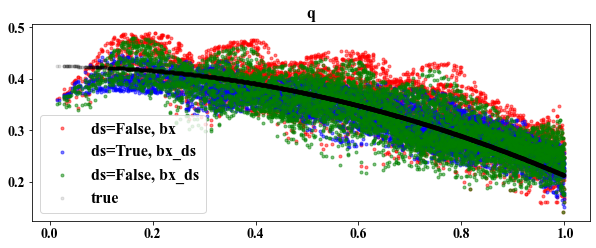

seed: 121
X.shape =  (7324, 2)
h: 0.07057571049375505
Sinkhorn converged at iter: 2675
s: 0.3
h: 0.07057571049375505
h: 0.07057571049375505
Sinkhorn converged at iter: 2675
s: 0.9
h: 0.07057571049375505
h: 0.07057571049375505


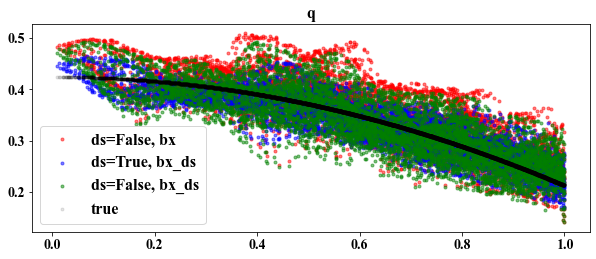

seed: 466
X.shape =  (7399, 2)
h: 0.06973579552416154
Sinkhorn converged at iter: 2618
s: 0.3
h: 0.06973579552416154
h: 0.06973579552416154
Sinkhorn converged at iter: 2618
s: 0.9
h: 0.06973579552416154
h: 0.06973579552416154


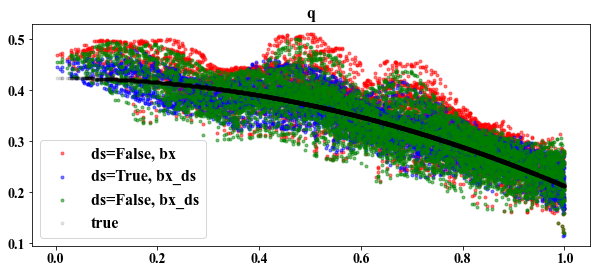

seed: 214
X.shape =  (7360, 2)
h: 0.06946861793613432
Sinkhorn converged at iter: 3017
s: 0.3
h: 0.06946861793613432
h: 0.06946861793613432
Sinkhorn converged at iter: 3017
s: 0.9
h: 0.06946861793613432
h: 0.06946861793613432


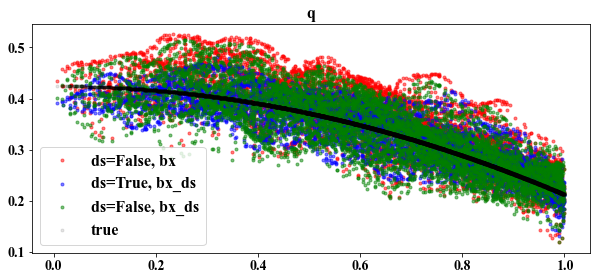

seed: 330
X.shape =  (7281, 2)
h: 0.07140157395832011
Sinkhorn converged at iter: 2738
s: 0.3
h: 0.07140157395832011
h: 0.07140157395832011
Sinkhorn converged at iter: 2738
s: 0.9
h: 0.07140157395832011
h: 0.07140157395832011


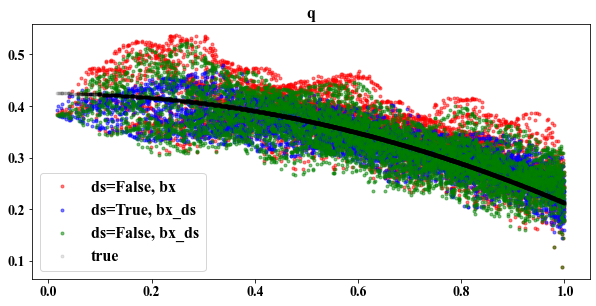

seed: 458
X.shape =  (7289, 2)
h: 0.07024934531921721
Sinkhorn converged at iter: 2992
s: 0.3
h: 0.07024934531921721
h: 0.07024934531921721
Sinkhorn converged at iter: 2992
s: 0.9
h: 0.07024934531921721
h: 0.07024934531921721


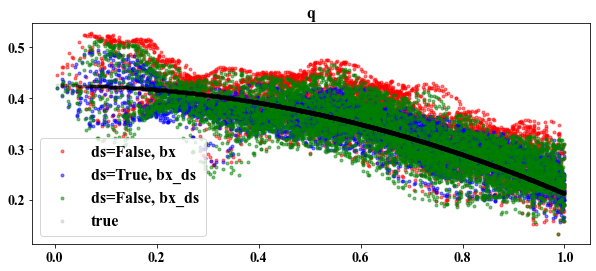

seed: 87
X.shape =  (7451, 2)
h: 0.07023128549161749
Sinkhorn converged at iter: 2874
s: 0.3
h: 0.07023128549161749
h: 0.07023128549161749
Sinkhorn converged at iter: 2874
s: 0.9
h: 0.07023128549161749
h: 0.07023128549161749


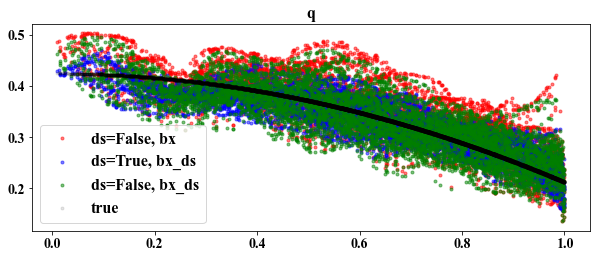

seed: 372
X.shape =  (7350, 2)
h: 0.07144469054115271
Sinkhorn converged at iter: 2904
s: 0.3
h: 0.07144469054115271
h: 0.07144469054115271
Sinkhorn converged at iter: 2904
s: 0.9
h: 0.07144469054115271
h: 0.07144469054115271


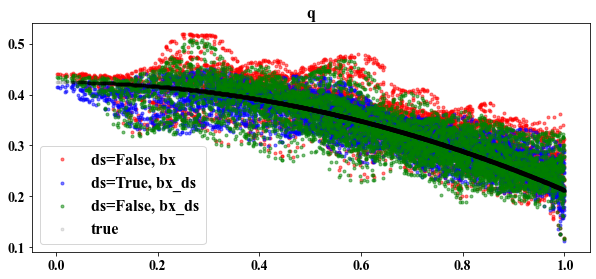

seed: 99
X.shape =  (7339, 2)
h: 0.07141070028754426
Sinkhorn converged at iter: 2825
s: 0.3
h: 0.07141070028754426
h: 0.07141070028754426
Sinkhorn converged at iter: 2825
s: 0.9
h: 0.07141070028754426
h: 0.07141070028754426


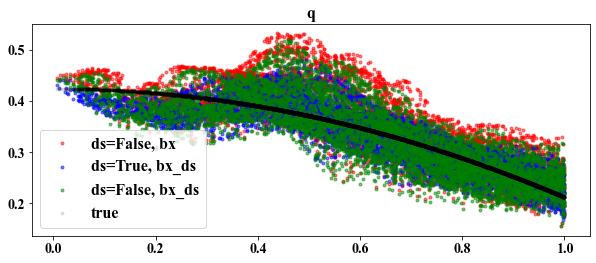

seed: 871
X.shape =  (7343, 2)
h: 0.07307469429555644
Sinkhorn converged at iter: 2684
s: 0.3
h: 0.07307469429555644
h: 0.07307469429555644
Sinkhorn converged at iter: 2684
s: 0.9
h: 0.07307469429555644
h: 0.07307469429555644


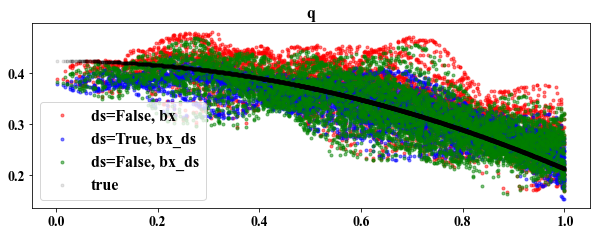

seed: 663
X.shape =  (7300, 2)
h: 0.06949135531097157
Sinkhorn converged at iter: 2930
s: 0.3
h: 0.06949135531097157
h: 0.06949135531097157
Sinkhorn converged at iter: 2930
s: 0.9
h: 0.06949135531097157
h: 0.06949135531097157


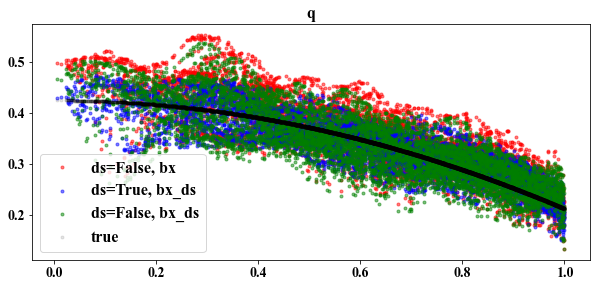

seed: 130
X.shape =  (7284, 2)
h: 0.07065212159995385
Sinkhorn converged at iter: 2952
s: 0.3
h: 0.07065212159995385
h: 0.07065212159995385
Sinkhorn converged at iter: 2952
s: 0.9
h: 0.07065212159995385
h: 0.07065212159995385


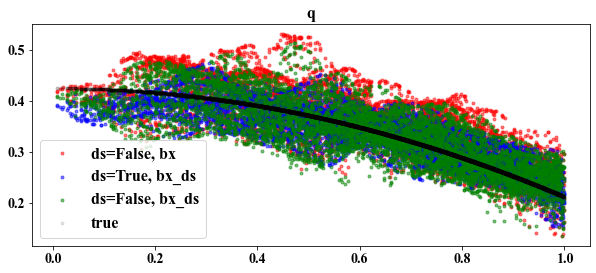

seed: 661
X.shape =  (7426, 2)
h: 0.07175948289076281
Sinkhorn converged at iter: 2847
s: 0.3
h: 0.07175948289076281
h: 0.07175948289076281
Sinkhorn converged at iter: 2847
s: 0.9
h: 0.07175948289076281
h: 0.07175948289076281


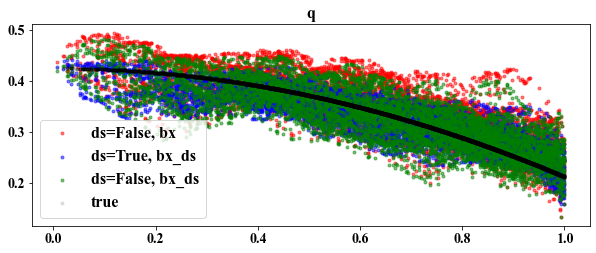

seed: 308
X.shape =  (7377, 2)
h: 0.0708345177713124
Sinkhorn converged at iter: 2917
s: 0.3
h: 0.0708345177713124
h: 0.0708345177713124
Sinkhorn converged at iter: 2917
s: 0.9
h: 0.0708345177713124
h: 0.0708345177713124


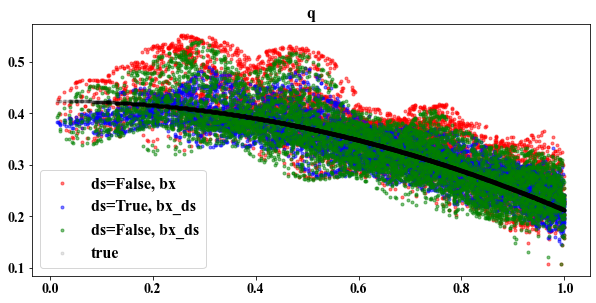

seed: 769
X.shape =  (7296, 2)
h: 0.07153455038487738
Sinkhorn converged at iter: 2654
s: 0.3
h: 0.07153455038487738
h: 0.07153455038487738
Sinkhorn converged at iter: 2654
s: 0.9
h: 0.07153455038487738
h: 0.07153455038487738


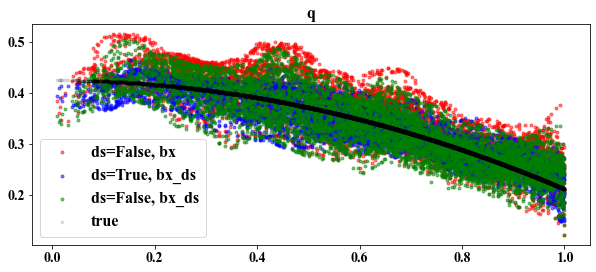

seed: 343
X.shape =  (7327, 2)
h: 0.0715552478497723
Sinkhorn converged at iter: 2624
s: 0.3
h: 0.0715552478497723
h: 0.0715552478497723
Sinkhorn converged at iter: 2624
s: 0.9
h: 0.0715552478497723
h: 0.0715552478497723


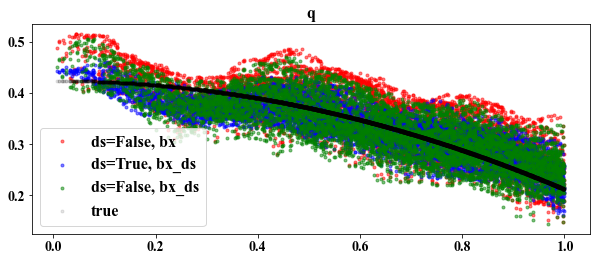

seed: 491
X.shape =  (7434, 2)
h: 0.07051919942633293
Sinkhorn converged at iter: 2652
s: 0.3
h: 0.07051919942633293
h: 0.07051919942633293
Sinkhorn converged at iter: 2652
s: 0.9
h: 0.07051919942633293
h: 0.07051919942633293


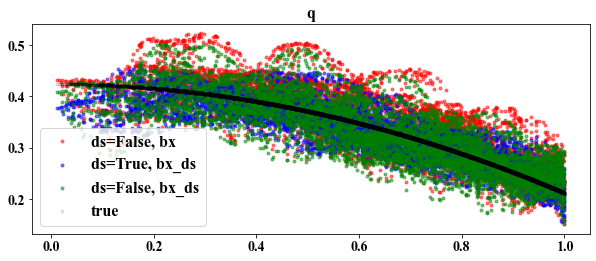

seed: 413
X.shape =  (7353, 2)
h: 0.07097965201009268
Sinkhorn converged at iter: 2894
s: 0.3
h: 0.07097965201009268
h: 0.07097965201009268
Sinkhorn converged at iter: 2894
s: 0.9
h: 0.07097965201009268
h: 0.07097965201009268


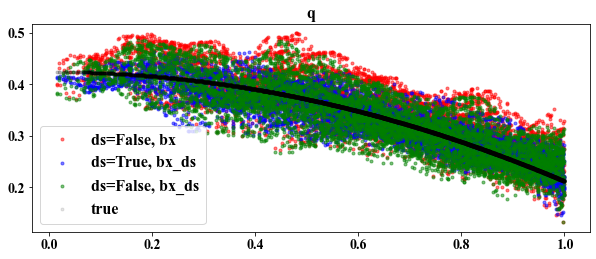

seed: 805
X.shape =  (7323, 2)
h: 0.07152669261726058
Sinkhorn converged at iter: 2821
s: 0.3
h: 0.07152669261726058
h: 0.07152669261726058
Sinkhorn converged at iter: 2821
s: 0.9
h: 0.07152669261726058
h: 0.07152669261726058


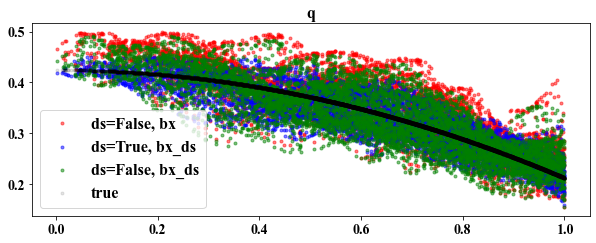

seed: 385
X.shape =  (7405, 2)
h: 0.07240425538734226
Sinkhorn converged at iter: 2904
s: 0.3
h: 0.07240425538734226
h: 0.07240425538734226
Sinkhorn converged at iter: 2904
s: 0.9
h: 0.07240425538734226
h: 0.07240425538734226


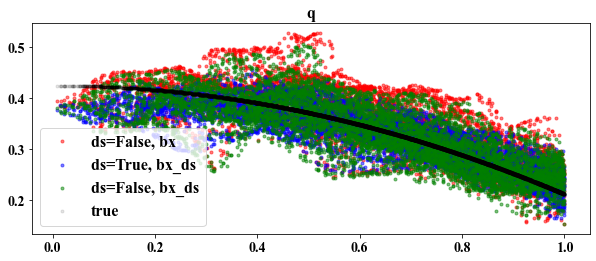

seed: 191
X.shape =  (7325, 2)
h: 0.07062042128697443
Sinkhorn converged at iter: 2954
s: 0.3
h: 0.07062042128697443
h: 0.07062042128697443
Sinkhorn converged at iter: 2954
s: 0.9
h: 0.07062042128697443
h: 0.07062042128697443


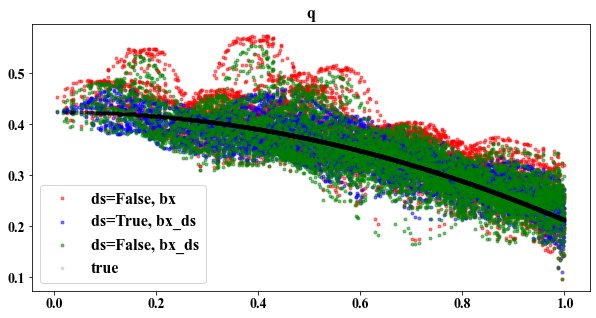

seed: 955
X.shape =  (7408, 2)
h: 0.06777451799083138
Sinkhorn converged at iter: 2809
s: 0.3
h: 0.06777451799083138
h: 0.06777451799083138
Sinkhorn converged at iter: 2809
s: 0.9
h: 0.06777451799083138
h: 0.06777451799083138


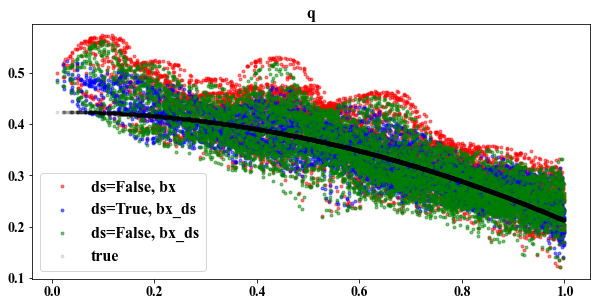

seed: 276
X.shape =  (7250, 2)
h: 0.07270879345043839
Sinkhorn converged at iter: 2845
s: 0.3
h: 0.07270879345043839
h: 0.07270879345043839
Sinkhorn converged at iter: 2845
s: 0.9
h: 0.07270879345043839
h: 0.07270879345043839


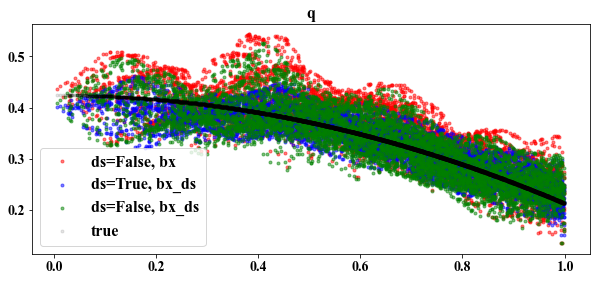

seed: 160
X.shape =  (7359, 2)
h: 0.07076805595694284
Sinkhorn converged at iter: 2731
s: 0.3
h: 0.07076805595694284
h: 0.07076805595694284
Sinkhorn converged at iter: 2731
s: 0.9
h: 0.07076805595694284
h: 0.07076805595694284


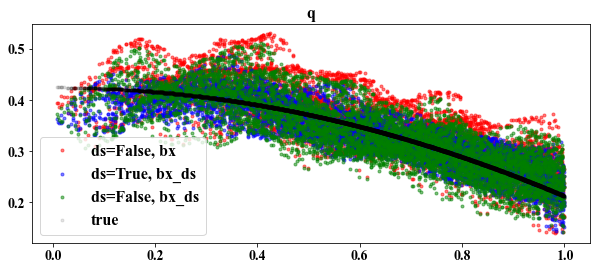

seed: 459
X.shape =  (7286, 2)
h: 0.06898548375440246
Sinkhorn converged at iter: 3050
s: 0.3
h: 0.06898548375440246
h: 0.06898548375440246
Sinkhorn converged at iter: 3050
s: 0.9
h: 0.06898548375440246
h: 0.06898548375440246


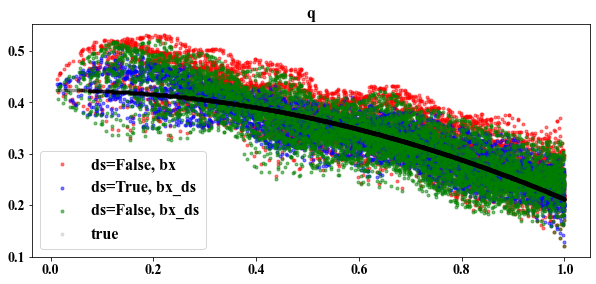

seed: 313
X.shape =  (7390, 2)
h: 0.06991856092563024
Sinkhorn converged at iter: 2754
s: 0.3
h: 0.06991856092563024
h: 0.06991856092563024
Sinkhorn converged at iter: 2754
s: 0.9
h: 0.06991856092563024
h: 0.06991856092563024


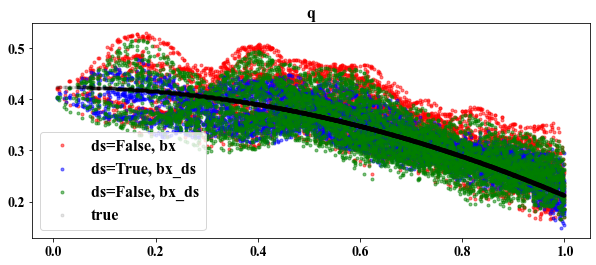

seed: 21
X.shape =  (7422, 2)
h: 0.07141576433975298
Sinkhorn converged at iter: 2643
s: 0.3
h: 0.07141576433975298
h: 0.07141576433975298
Sinkhorn converged at iter: 2643
s: 0.9
h: 0.07141576433975298
h: 0.07141576433975298


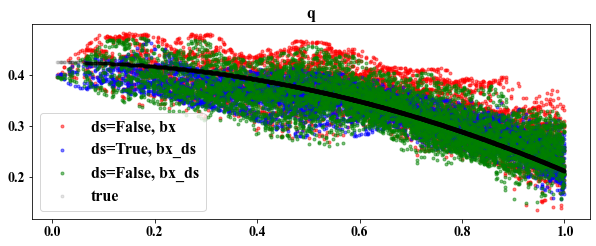

seed: 252
X.shape =  (7382, 2)
h: 0.06993912728732653
Sinkhorn converged at iter: 2912
s: 0.3
h: 0.06993912728732653
h: 0.06993912728732653
Sinkhorn converged at iter: 2912
s: 0.9
h: 0.06993912728732653
h: 0.06993912728732653


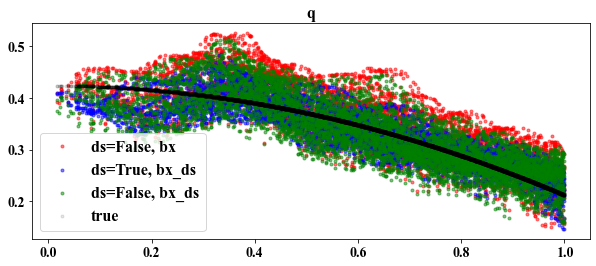

seed: 747
X.shape =  (7341, 2)
h: 0.07194646865580578
Sinkhorn converged at iter: 2859
s: 0.3
h: 0.07194646865580578
h: 0.07194646865580578
Sinkhorn converged at iter: 2859
s: 0.9
h: 0.07194646865580578
h: 0.07194646865580578


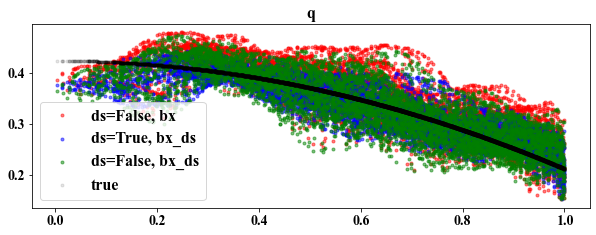

seed: 856
X.shape =  (7316, 2)
h: 0.07154987371597793
Sinkhorn converged at iter: 2888
s: 0.3
h: 0.07154987371597793
h: 0.07154987371597793
Sinkhorn converged at iter: 2888
s: 0.9
h: 0.07154987371597793
h: 0.07154987371597793


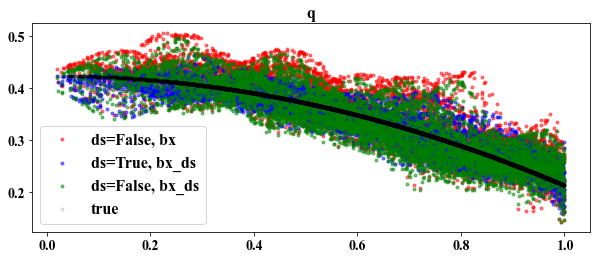

seed: 560
X.shape =  (7386, 2)
h: 0.06934504217977036
Sinkhorn converged at iter: 3017
s: 0.3
h: 0.06934504217977036
h: 0.06934504217977036
Sinkhorn converged at iter: 3017
s: 0.9
h: 0.06934504217977036
h: 0.06934504217977036


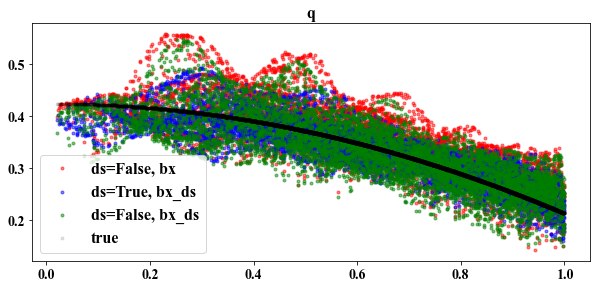

seed: 474
X.shape =  (7404, 2)
h: 0.06989056627516775
Sinkhorn converged at iter: 2987
s: 0.3
h: 0.06989056627516775
h: 0.06989056627516775
Sinkhorn converged at iter: 2987
s: 0.9
h: 0.06989056627516775
h: 0.06989056627516775


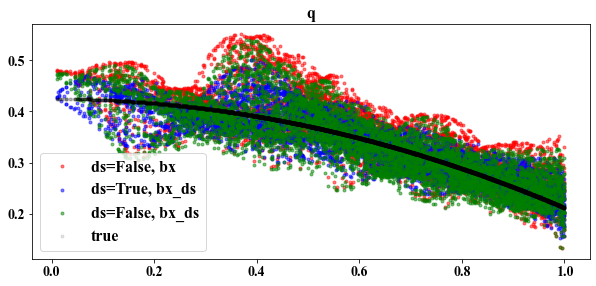

seed: 58
X.shape =  (7362, 2)
h: 0.06963642585646042
Sinkhorn converged at iter: 2691
s: 0.3
h: 0.06963642585646042
h: 0.06963642585646042
Sinkhorn converged at iter: 2691
s: 0.9
h: 0.06963642585646042
h: 0.06963642585646042


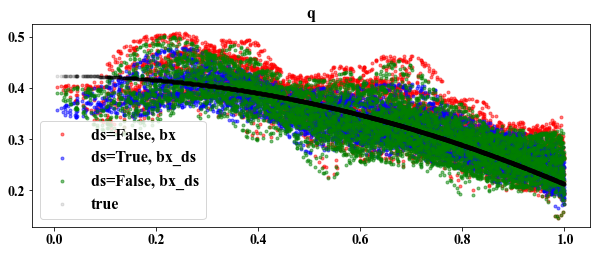

seed: 510
X.shape =  (7352, 2)
h: 0.07103265412279558
Sinkhorn converged at iter: 2728
s: 0.3
h: 0.07103265412279558
h: 0.07103265412279558
Sinkhorn converged at iter: 2728
s: 0.9
h: 0.07103265412279558
h: 0.07103265412279558


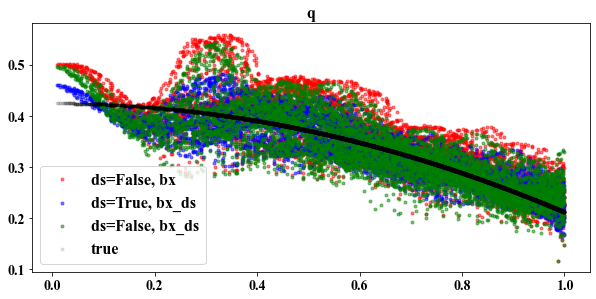

seed: 681
X.shape =  (7298, 2)
h: 0.07050172420471187
Sinkhorn converged at iter: 2947
s: 0.3
h: 0.07050172420471187
h: 0.07050172420471187
Sinkhorn converged at iter: 2947
s: 0.9
h: 0.07050172420471187
h: 0.07050172420471187


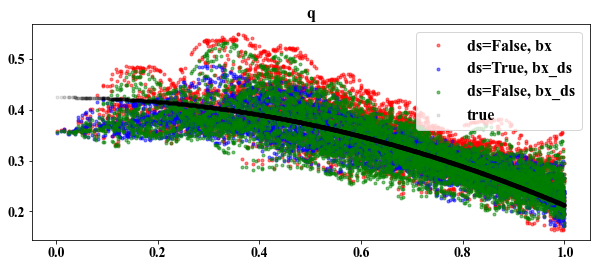

seed: 475
X.shape =  (7461, 2)
h: 0.07097865197445563
Sinkhorn converged at iter: 2946
s: 0.3
h: 0.07097865197445563
h: 0.07097865197445563
Sinkhorn converged at iter: 2946
s: 0.9
h: 0.07097865197445563
h: 0.07097865197445563


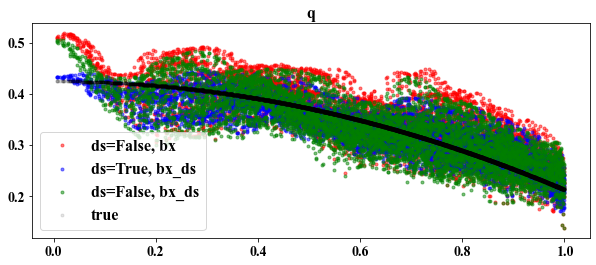

seed: 699
X.shape =  (7314, 2)
h: 0.06904233939664317
Sinkhorn converged at iter: 2896
s: 0.3
h: 0.06904233939664317
h: 0.06904233939664317
Sinkhorn converged at iter: 2896
s: 0.9
h: 0.06904233939664317
h: 0.06904233939664317


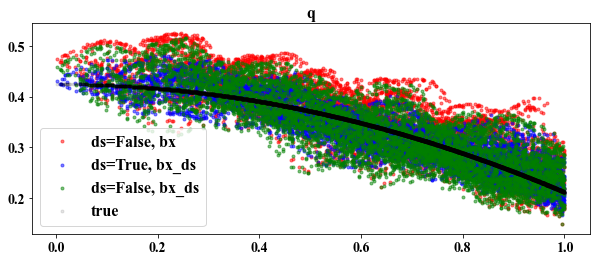

seed: 975
X.shape =  (7310, 2)
h: 0.07079423558319305
Sinkhorn converged at iter: 2861
s: 0.3
h: 0.07079423558319305
h: 0.07079423558319305
Sinkhorn converged at iter: 2861
s: 0.9
h: 0.07079423558319305
h: 0.07079423558319305


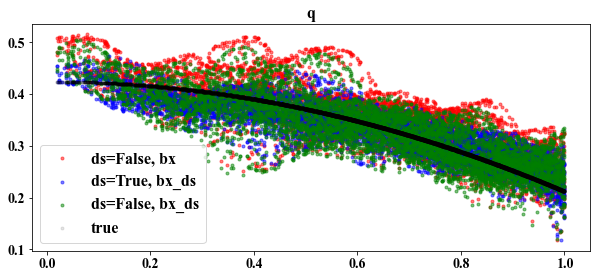

seed: 782
X.shape =  (7338, 2)
h: 0.07094063941174651
Sinkhorn converged at iter: 2869
s: 0.3
h: 0.07094063941174651
h: 0.07094063941174651
Sinkhorn converged at iter: 2869
s: 0.9
h: 0.07094063941174651
h: 0.07094063941174651


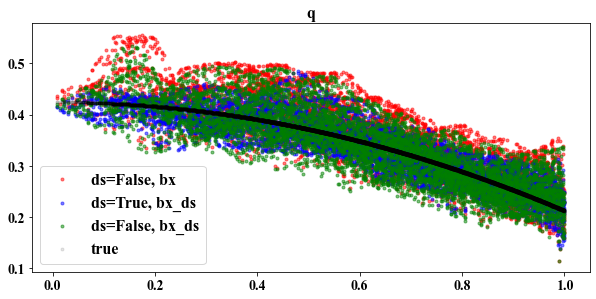

seed: 189
X.shape =  (7394, 2)
h: 0.07150513251241468
Sinkhorn converged at iter: 2609
s: 0.3
h: 0.07150513251241468
h: 0.07150513251241468
Sinkhorn converged at iter: 2609
s: 0.9
h: 0.07150513251241468
h: 0.07150513251241468


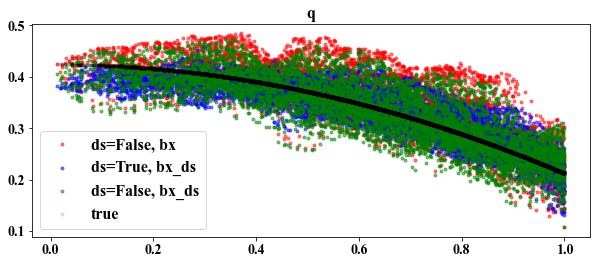

seed: 957
X.shape =  (7339, 2)
h: 0.0698024712987042
Sinkhorn converged at iter: 2754
s: 0.3
h: 0.0698024712987042
h: 0.0698024712987042
Sinkhorn converged at iter: 2754
s: 0.9
h: 0.0698024712987042
h: 0.0698024712987042


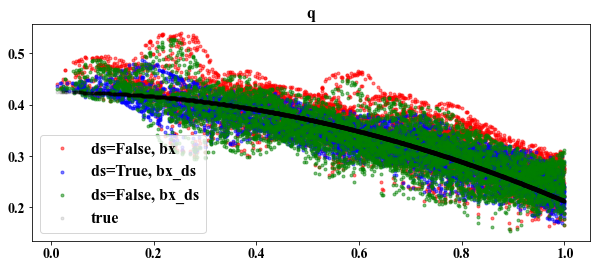

seed: 686
X.shape =  (7439, 2)
h: 0.07093340100138094
Sinkhorn converged at iter: 2556
s: 0.3
h: 0.07093340100138094
h: 0.07093340100138094
Sinkhorn converged at iter: 2556
s: 0.9
h: 0.07093340100138094
h: 0.07093340100138094


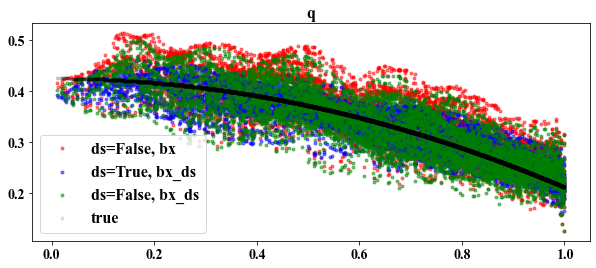

In [20]:
q_ds_all = []
q1_all = []
q2_all = []
r_all = []
n_runs = 50
np.random.seed(42)
seeds = np.random.randint(0, 1000, n_runs)

for seed in seeds.tolist():
    print('seed:', seed)
    X, labelsMat, ddX = datasets.Datasets().circular_disk_sauer(n=12500, seed=seed)
    
    opts = bx_util.default_opts
    opts['k_nn'] = 256
    opts['k_tune'] = 256
    opts['ds'] = True
    opts['s'] = 0.3
    bx_ds, bx_init_ds = bx_util.estimate_bx(X)
    
    opts['ds'] = False
    bx, bx_init = bx_util.estimate_bx(X)
    
    opts2 = bx_util.default_opts
    opts2['k_nn'] = 256
    opts2['k_tune'] = 256
    opts2['ds'] = True
    opts2['s'] = 0.9

    q_ds = bx_util.estimate_q(X, opts=opts2, bx=bx_ds)
    
    opts2['ds'] = False
    q1 = bx_util.estimate_q(X, opts=opts2, bx=bx)
    q2 = bx_util.estimate_q(X, opts=opts2, bx=bx_ds)
    
    
    plt.figure(figsize=(10, 5))
    plt.scatter(np.linalg.norm(X[:,:2], axis=1), q1, color='r', label='ds=False, bx', alpha=0.5)
    plt.scatter(np.linalg.norm(X[:,:2], axis=1), q_ds, color='b', label='ds=True, bx_ds', alpha=0.5)
    plt.scatter(np.linalg.norm(X[:,:2], axis=1), q2, color='g', label='ds=False, bx_ds', alpha=0.5)
    r = np.linalg.norm(X[:,:2], axis=1)
    plt.scatter(r, (2/(3*np.pi))*(2-r**2), color='k', label='true', alpha=0.1)
    plt.title('q')
    plt.legend()
    plt.axis('image')
    plt.show()
    
    r_all.append(r)
    q_ds_all.append(q_ds)
    q1_all.append(q1)
    q2_all.append(q2)

In [21]:
from scipy import interpolate


q_ds_final = 0
q1_final = 0
q2_final = 0
r_min = 0
r_max = 1
for i in range(len(r_all)):
    r_min = max(r_min, np.min(r_all[i]))
    r_max = min(r_max, np.max(r_all[i]))

r_final = np.linspace(r_min, r_max, 100)

for i in range(len(r_all)):
    f_ds = interpolate.interp1d(r_all[i].flatten(), q_ds_all[i].flatten())
    f1 = interpolate.interp1d(r_all[i].flatten(), q1_all[i].flatten())
    f2 = interpolate.interp1d(r_all[i].flatten(), q2_all[i].flatten())
    
    q_ds_final += f_ds(r_final)
    q1_final += f1(r_final)
    q2_final += f2(r_final)

q_ds_final /= len(r_all)
q1_final /= len(r_all)
q2_final /= len(r_all)

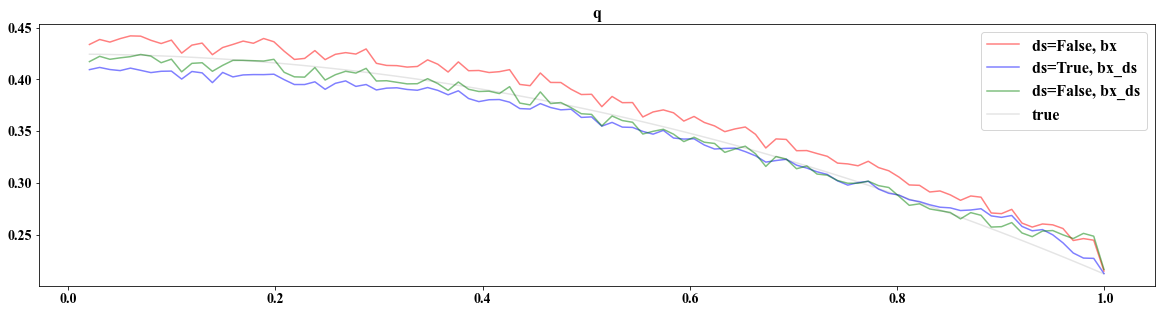

In [22]:
plt.figure(figsize=(20, 8))
plt.plot(r_final, q1_final, color='r', label='ds=False, bx', alpha=0.5)
plt.plot(r_final, q_ds_final, color='b', label='ds=True, bx_ds', alpha=0.5)
plt.plot(r_final, q2_final, color='g', label='ds=False, bx_ds', alpha=0.5)
plt.plot(r_final, (2/(3*np.pi))*(2-r_final**2), color='k', label='true', alpha=0.1)
plt.title('q')
plt.legend()
plt.axis('image')
plt.show()